In [17]:
import numpy as np
import pandas as pd

In [25]:
data=pd.read_csv('Advertising.csv',index_col=0)

In [26]:
data.head(5)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [27]:
inp=data.drop('Sales',1)

In [28]:
out=data['Sales']

In [29]:
import statsmodels.api as sm

In [33]:
inp_c=sm.add_constant(inp)

In [32]:
ols=sm.OLS(out,inp_c)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           1.58e-96
Time:                        14:49:16   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
inp_1=inp.drop('Newspaper',1)

In [36]:
inp_c=sm.add_constant(inp_1)
ols=sm.OLS(out,inp_c)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 20 Dec 2019   Prob (F-statistic):           4.83e-98
Time:                        15:06:18   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linearity

In [37]:
pred=ols_mod.predict(inp_c)

In [41]:
import matplotlib.pyplot  as plt

In [43]:
import seaborn as sns
%matplotlib inline

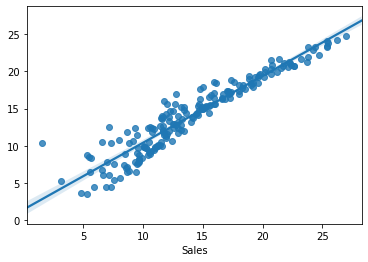

In [44]:
sns.regplot(out,pred)

### Normality

In [45]:
from statsmodels.stats.diagnostic import normal_ad

In [48]:
res=out-pred   # though we are checking normality for the residuals

In [49]:
normal_ad(res)

(3.6973801863587994, 2.9579356167375647e-09)

### Log Transformations

In [63]:
inp2=np.power(inp_1,0.7)

In [64]:
inp2.head(10)

,TV,Radio
1,45.013381,12.712889
2,14.251219,13.063958
3,7.326051,14.563605
4,33.596098,13.525865
5,38.022345,5.289281
6,4.546356,15.223559
7,17.051692,11.510964
8,28.571506,8.027480
9,4.509713,1.680945
10,40.777147,1.952007


In [65]:
inp_c=sm.add_constant(inp2)
ols=sm.OLS(out,inp_c)
ols_mod=ols.fit()
ols_mod.summary()
pred=ols_mod.predict(inp_c)
resid=out-pred

In [66]:
normal_ad(resid)

(0.6535837390334223, 0.0868297590334882)

### Multicolinearity

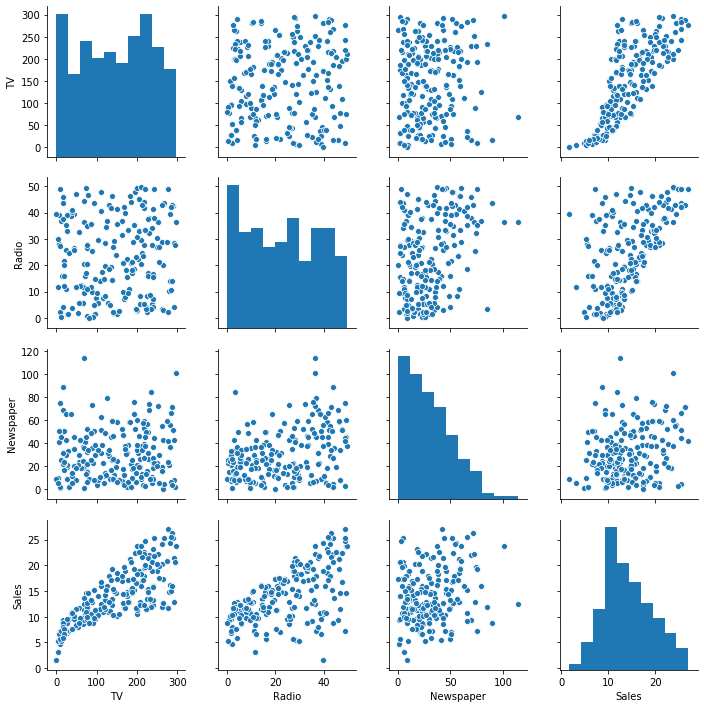

In [67]:
sns.pairplot(data)

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
import pandas as pd

In [81]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inp2.values,i) for i in range(inp2.shape[1])]
vif['feature_name']=inp2.columns

In [82]:
vif

,VIF,feature_name
0,3.059411,TV
1,3.059411,Radio


### Hetroscedacity

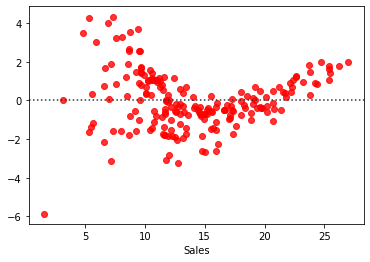

In [96]:
sns.residplot(out,resid,color='r')

In [98]:
from sklearn.preprocessing import PolynomialFeatures

In [104]:
pf=PolynomialFeatures(degree=2,include_bias=False,interaction_only=True)
# transforming it
inp2_pf=pf.fit_transform(inp2)

In [105]:
inp2_pf

array([[4.50133809e+01, 1.27128891e+01, 5.72250121e+02],
       [1.42512188e+01, 1.30639583e+01, 1.86177328e+02],
       [7.32605058e+00, 1.45636046e+01, 1.06693704e+02],
       [3.35960983e+01, 1.35258646e+01, 4.54416277e+02],
       [3.80223450e+01, 5.28928086e+00, 2.01110862e+02],
       [4.54635639e+00, 1.52235592e+01, 6.92117257e+01],
       [1.70516925e+01, 1.15109639e+01, 1.96281416e+02],
       [2.85715057e+01, 8.02748033e+00, 2.29357200e+02],
       [4.50971312e+00, 1.68094501e+00, 7.58057977e+00],
       [4.07771472e+01, 1.95200688e+00, 7.95972718e+01],
       [1.87992716e+01, 3.42294243e+00, 6.43488244e+01],
       [4.28827305e+01, 9.25013070e+00, 3.96670862e+02],
       [9.19610391e+00, 1.20702143e+01, 1.10998945e+02],
       [2.46776176e+01, 4.13589510e+00, 1.02064038e+02],
       [4.13894927e+01, 1.15355187e+01, 4.77449268e+02],
       [4.01464540e+01, 1.49610772e+01, 6.00634200e+02],
       [1.91364240e+01, 1.24290164e+01, 2.37846927e+02],
       [5.18235149e+01, 1.31336

In [106]:
inp_c=sm.add_constant(inp2_pf)
ols=sm.OLS(out,inp_c)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     3718.
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          2.01e-172
Time:                        16:00:34   Log-Likelihood:                -207.82
No. Observations:                 200   AIC:                             423.6
Df Residuals:                     196   BIC:                             436.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9254      0.262     22.621      0.000       5.409       6.442
x1             0.0752      0.008      9.627      0.000       0.060       0.091
x2            -0.0383      0.027     -1.431      0.154      -0.091       0.014
x3             0.0223      0.001     28.447      0.000       0.021       0.024
==============================================================================
Omnibus:                       83.916   Durbin-Watson:                   2.225
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              475.627
Skew:                          -1.498   Prob(JB):                    5.24e-104
Kurtosis:                       9.936   Cond. No.                     1.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""